### Updating packages ###
### Finished updating packages ###


          quantity   unit price   ext price
count  1000.000000  1000.000000  1000.00000
mean     10.328000    56.179630   579.84390
std       5.687597    25.331939   435.30381
min       1.000000    10.060000    10.38000
25%       5.750000    35.995000   232.60500
50%      10.000000    56.765000   471.72000
75%      15.000000    76.802500   878.13750
max      20.000000    99.970000  1994.80000


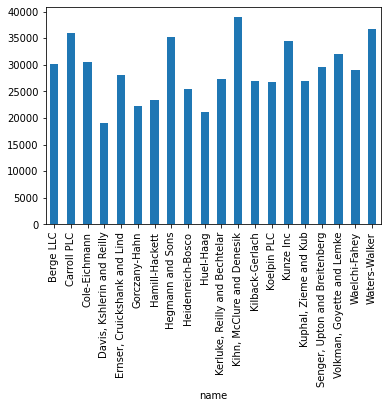

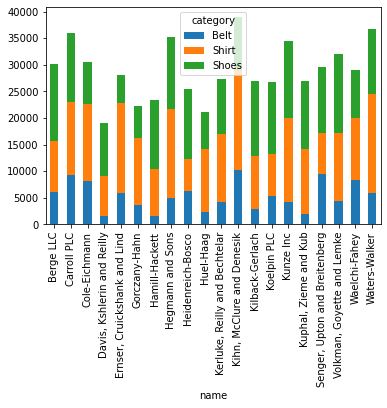

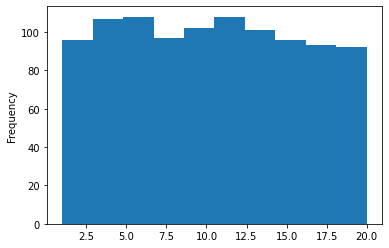

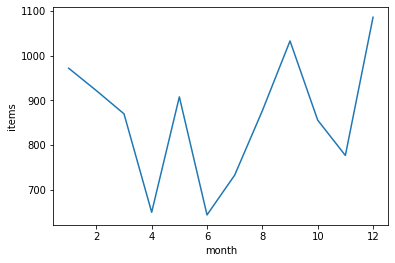

In [8]:
# This is to make sure that the kernel is using the latest stable packages for numpy and pandas.
print('### Updating packages ###')
import sys
!{sys.executable} -m pip install numpy==1.19.3 --user
!{sys.executable} -m pip install pandas==1.1.4 --user
print('### Finished updating packages ###\n\n')

# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2
file = "sample-salesv2.csv"
data = pd.read_csv(file, ',', header=0)
print(data.loc[:,data.columns != 'account number'].describe())

# 3
customer_data = data.filter(items=["name", "category", "quantity", "unit price", "ext price", "date"])

# 4
total_sales = customer_data.groupby(['name'])["ext price"].sum()

# 5
total_sales.plot.bar()
plt.show()

# 6-8
customer_data.groupby(['name', 'category'])["ext price"].sum().unstack(1).plot.bar(stacked=True)
plt.show()

# 9
customer_data["quantity"].plot(kind='hist')
plt.show()

# 10
# Line graph for quantity per month, if they want the number of transactions that can be done too
line_data = data.filter(items=['name', 'quantity', 'date'])
line_data.index = pd.to_datetime(line_data['date'], format='%Y-%m-%d %H:%M:%S')
ax = line_data.groupby(by=[line_data.index.month])['quantity'].sum().plot(legend=False, ylabel='items', xlabel='month')
# line_data.groupby(by=[line_data.index.month])['quantity'].count().plot(legend=False, ylabel='transactions',
#                                                                        xlabel='month')
fig = ax.get_figure()
plt.show()

# 11  
fig.savefig('linechart.png')